In [1]:
#set parent directory as package
import sys
sys.path.append("..")

from quantities_vs_num_dimensions_vs_bandwidth import *

In [ ]:
simulation_set_index = 0
dataset_set_index = 1
performance_of_quantum_simulations = load_feather_folder_as_pd(f"../data/results/svc_performance_quantum_{simulation_set_index}_{dataset_set_index}", initial_key="performance_quantum")

4.947684049606323


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_15144\351518359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_of_quantum_simulations_[bandwidth_str] =  performance_of_quantum_simulations_["bandwidth"]
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_15144\351518359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_of_quantum_simulations_[performance_str] = performance_of_quantum_simulations_["accuracy"]


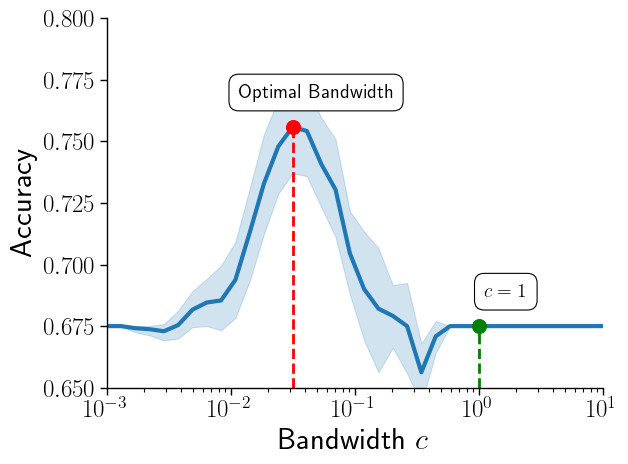

In [ ]:
performance_of_quantum_simulations_ = performance_of_quantum_simulations[performance_of_quantum_simulations["num_qubits"] == 10]
bandwidth_str = "Bandwidth $c$"

performance_of_quantum_simulations_[bandwidth_str] =  performance_of_quantum_simulations_["bandwidth"]
performance_str = "Accuracy"
performance_of_quantum_simulations_[performance_str] = performance_of_quantum_simulations_["accuracy"]

#create a plt
fig, ax = plt.subplots()
g =sns.lineplot(data=performance_of_quantum_simulations_, x=bandwidth_str, y=performance_str,  markers=True, dashes=False, ax=ax)
#g in log scale
performance_of_quantum_simulations_simplified = performance_of_quantum_simulations_[[bandwidth_str, performance_str, "seed"]]
#group by seed and get the mean
performance_of_quantum_simulations_simplified = performance_of_quantum_simulations_simplified.groupby([bandwidth_str]).mean().reset_index()

#plot the best bandwidth
best_bandwidth = performance_of_quantum_simulations_simplified.loc[performance_of_quantum_simulations_simplified[performance_str].idxmax()][bandwidth_str]
best_performance_score = performance_of_quantum_simulations_simplified.loc[performance_of_quantum_simulations_simplified[performance_str].idxmax()][performance_str]



#plot the best bandwidth
ylim = 0.65
ax.plot([best_bandwidth, best_bandwidth], [ylim, best_performance_score], color='red', linestyle='dashed', linewidth=2)
ax.scatter(best_bandwidth, best_performance_score, color='red', s=100, zorder=10)
ax.set_ylim(ylim, 0.80)
#write a text "Optimal Bandwidth" should be in a box at the possition of the best bandwidth rounded corners of the box
plt.text(best_bandwidth-0.02, 0.012+best_performance_score, "Optimal Bandwidth", bbox=dict(facecolor='white', alpha=1,  boxstyle='round,pad=0.5'), fontsize=14)

#plot c=1

ax.plot([1, 1], [ylim, 0.675], color='green', linestyle='dashed', linewidth=2)
ax.scatter(1, 0.675, color='green', s=100, zorder=10)

#write c=1 with the same style as the optimal bandwidth
plt.text(1+0.11, 0.675 +0.012, "$c=1$", bbox=dict(facecolor='white', alpha=1,  boxstyle='round,pad=0.5'), fontsize=14)


#ax set log scale
ax.set_xscale("log")
ax.set_xlim(10**-3, 10)

#remove upper and right spines
sns.despine()

#save as svg 
#plt.savefig(f"../plotting/thesis_plots/overview_accuracy_vs_c.svg")

# Not on paper

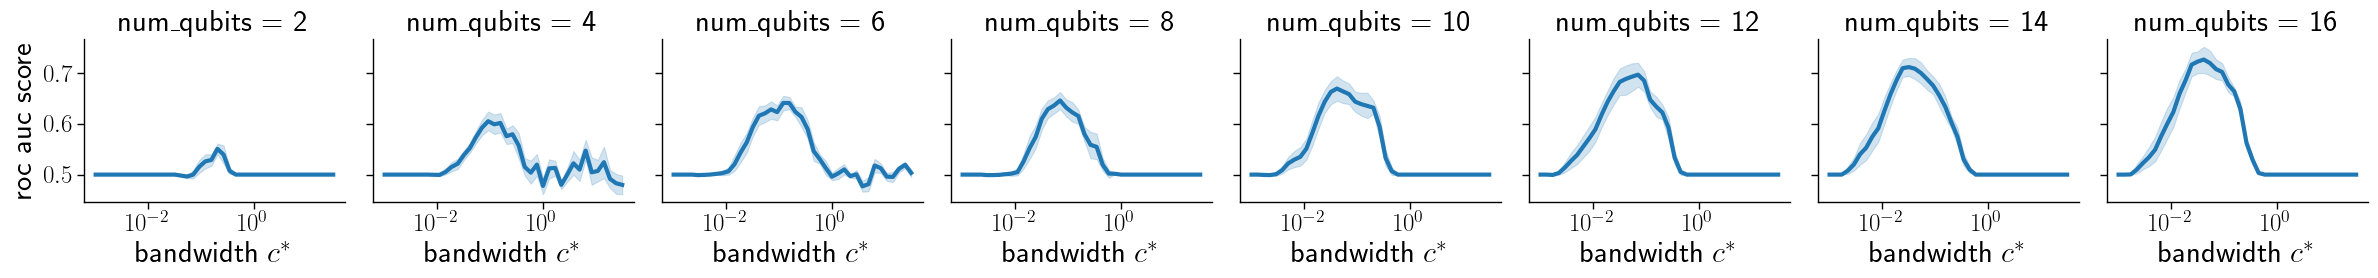

In [3]:
#performance_of_quantum_simulations_ = performance_of_quantum_simulations[performance_of_quantum_simulations["num_qubits"] == 14]
performance_of_quantum_simulations_ = performance_of_quantum_simulations

performance_of_quantum_simulations_[bandwidth_str] =  performance_of_quantum_simulations_["bandwidth"]
performance_of_quantum_simulations_[performance_str] = performance_of_quantum_simulations_["roc_auc_score"]

#g =sns.lineplot(data=performance_of_quantum_simulations_, x=bandwidth_str, y=performance_str,  markers=True, dashes=False)
#line plot with column
g = sns.FacetGrid(performance_of_quantum_simulations_, col="num_qubits")
g.map(sns.lineplot, bandwidth_str, performance_str)
#set log scale
g.set(xscale="log")

#g in log scale